<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Модель" data-toc-modified-id="Модель-1">Модель</a></span></li><li><span><a href="#Код-с-предыдущих-обсуждений" data-toc-modified-id="Код-с-предыдущих-обсуждений-2">Код с предыдущих обсуждений</a></span></li><li><span><a href="#Классификатор" data-toc-modified-id="Классификатор-3">Классификатор</a></span><ul class="toc-item"><li><span><a href="#Как-голосовать?" data-toc-modified-id="Как-голосовать?-3.1">Как голосовать?</a></span><ul class="toc-item"><li><span><a href="#Простейший-способ" data-toc-modified-id="Простейший-способ-3.1.1">Простейший способ</a></span></li></ul></li><li><span><a href="#А-если-равное-число-голосов?" data-toc-modified-id="А-если-равное-число-голосов?-3.2">А если равное число голосов?</a></span></li></ul></li><li><span><a href="#Проклятие-размерности" data-toc-modified-id="Проклятие-размерности-4">Проклятие размерности</a></span><ul class="toc-item"><li><span><a href="#Пруф" data-toc-modified-id="Пруф-4.1">Пруф</a></span></li></ul></li></ul></div>

## Модель

Простейшая модель, для которой нужно:
- некоторая идея о растоянии
- допущение, что расположенные близко друг к другу точки, похожи

## Код с предыдущих обсуждений

In [23]:
from typing import List
import math

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    return dot(v, v)

def subtract(v: Vector, w: Vector) -> Vector:
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))

## Классификатор

In [6]:
from typing import NamedTuple

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def knn_classify(k: int,
                labeled_points: List[LabeledPoint],
                new_point: Vector) -> str:
    
    # упорядочиваем точки
    by_distance = sorted(labeled_points, 
                         key=lambda lp: distance(lp.point, new_point))
    
    # ищем метки(например, "спам?", "любимый ЯП") для k ближайших точек
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # даем им проголосовать
    return majority_vote(k_nearest_labels)

### Как голосовать?

#### Простейший способ

In [17]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str: 
    votes = Counter(labels)
    winner, _c = votes.most_common(1)[0]
    
    print(votes.values())
    
    return winner

assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

dict_values([1, 2, 1])


### А если равное число голосов?

- Выбрать одного из победителей случайно
- Взвесить голоса по расстоянию и выбрать взвешенного победителя
- Уменьшать **k** до тех пор, пока не будет найден уникальный победитель

Реализуем 3-ий вариант:

In [18]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest.""" 
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0] 
    num_winners = len([count 
                       for count in vote_counts.values() 
                       if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])
    
# Сначала ниъья, поэтому на втором шаге берем только первые 4
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

## Проклятие размерности

При больших размерностях:
- Точки, как правило, не распалагются близко друг к другу
- Ближайшие точки зачастую будут лежать не намного ближе, чем среднее. А значит и близкая расположенность теряет особый смысл.

### Пруф

In [24]:
import random

random.seed(12)

def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distances(dim: int, num_pairs: int) -> List[float]: 
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

import tqdm
dimensions = range(1, 101)
avg_distances = []
min_distances = []

random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000)      # 10,000 random pairs 
    avg_distances.append(sum(distances) / 10000)  # track the average 
    min_distances.append(min(distances))          # track the minimum


Curse of Dimensionality: 100%|████████████████| 100/100 [00:14<00:00,  6.69it/s]


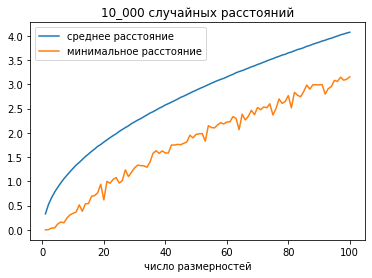

In [29]:
import matplotlib.pyplot as plt
plt.plot(dimensions, avg_distances, label="среднее расстояние")
plt.plot(dimensions, min_distances, label="минимальное расстояние")

plt.xlabel('число размерностей')
plt.title('10_000 случайных расстояний')
  
plt.legend()
plt.show()

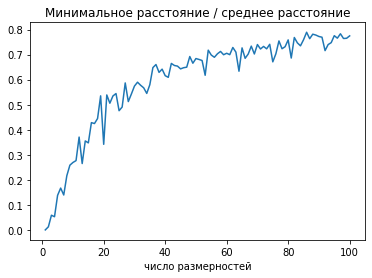

In [30]:
min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

import matplotlib.pyplot as plt
plt.plot(dimensions, min_avg_ratio)

plt.xlabel('число размерностей')
plt.title('Минимальное расстояние / среднее расстояние')
  
plt.show()